## Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures

## Importing Dataset and visulize it

In [10]:
df = pd.read_csv('FINAL_CLEAN2.csv')
df= df.loc[:,~df.columns.str.contains('^Unnamed: 0')]
df.head()

,year,tabaghat,parking,anbari,metrag,price,source,asansor,room,floor,lat,vahed,long,shomali,date
0,1396.0,4,0,0,40,38750000,iranfile,0,1,3.0,36.47018,4.0,52.60150,0.0,1401/09/10
1,1391.0,5,1,0,80,45625000,iranfile,1,2,3.0,31.17727,5.0,44.96124,0.0,1401/09/10
2,1387.0,4,0,1,62,25000000,iranfile,0,2,4.0,36.47018,4.0,52.60150,0.0,1401/09/10
3,1381.0,2,0,0,43,32558000,iranfile,0,1,1.0,36.95833,2.0,53.25000,1.0,1401/09/10
4,1400.0,4,0,0,50,37400000,iranfile,1,1,3.0,36.47018,4.0,52.60150,0.0,1401/09/10


In [11]:
df=df.drop(['source','date'],axis=1)

In [12]:
df["price"] = df["price"].str.replace(',', '')

In [13]:
df['floor'].unique()

array(['3.0', '4.0', '1.0', '2.0', nan, '0.0', '9.0', '5.0', '6.0', '8.0',
       '7.0', '10.0', '11.0', '13.0', '20.0', '19.0', '12.0', '-2.0',
       '17.0', '15.0', '24.0', '14.0', '18.0', '21.0', '16.0', '22.0',
       '-1.0', '6', '1', '4', '5', '11', '2', '8', '3', '12', '16', '1۰',
       '24', '7', '2۰', '9', '30', '18', '25', '14', '+3', '3۰', '22',
       '26', '13', '17', '29', '21', '15', '28', '19', '23', '20', '27',
       '27.0', '25.0', '31.0', '30.0'], dtype=object)

In [14]:
df['tabaghat']= df['tabaghat'].str.replace('---', 'nan')

In [15]:
df['tabaghat'].unique()

array(['4', '5', '2', '9', '12', '7', '6', '1', '3', '14', 'nan', '15',
       '8', '18', '10', '11', '24', '17', '21', '20', '13', '30', '16',
       '19', '34', '27', '29', '35', '31', '22', '25', '32', '23', '36',
       '26', nan, '5.0', '4.0', '6.0', '10.0', '9.0', '3.0', '8.0', '7.0',
       '11.0', '12.0', '1.0', '26.0', '13.0', '2.0', '19.0', '20.0',
       '17.0', '15.0', '27.0', '90.0', '14.0', '200.0', '25.0', '24.0',
       '16.0', '22.0', '18.0', '21.0', '28.0', '195.0', '30.0', '41.0',
       '31.0', '42.0', '29.0', '23.0'], dtype=object)

## change object type to numerical

In [16]:
from unidecode import unidecode

In [17]:
df['price'] = pd.to_numeric(df.price.apply(unidecode), errors='coerce')

In [18]:
df['floor']= df['floor'].str.replace('کا', '30')

In [229]:
df['tabaghat']= df['tabaghat'].str.replace('---', '5')

In [19]:
df['price'] = df['price'].astype(float)
df['metrag'] = df['metrag'].astype(float)
df['room'] = df['room'].astype(float)
df['floor'] = df['floor'].astype(float)
df['tabaghat'] = df['tabaghat'].astype(float)

In [231]:
# df['parking'] = df['parking'].astype(object)
# df['anbari'] = df['parking'].astype(object)
# df['asansor'] = df['parking'].astype(object)
# df['shomali'] = df['shomali'].astype(object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20857 entries, 0 to 20856
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      20067 non-null  float64
 1   tabaghat  16060 non-null  float64
 2   parking   20857 non-null  int64  
 3   anbari    20857 non-null  int64  
 4   metrag    20857 non-null  float64
 5   price     16927 non-null  float64
 6   asansor   20857 non-null  int64  
 7   room      20857 non-null  float64
 8   floor     19494 non-null  float64
 9   lat       16402 non-null  float64
 10  vahed     16927 non-null  float64
 11  long      16402 non-null  float64
 12  shomali   16927 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 2.1 MB


In [21]:
df.isnull().sum()

year         790
tabaghat    4797
parking        0
anbari         0
metrag         0
price       3930
asansor        0
room           0
floor       1363
lat         4455
vahed       3930
long        4455
shomali     3930
dtype: int64

## Taking care of missing data

## Price

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['price']])
df[['price']]= imputer.transform(df[['price']])

## year

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['year']])
df[['year']]= imputer.transform(df[['year']])

## Tabaghat

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['tabaghat']])
df[['tabaghat']]= imputer.transform(df[['tabaghat']])

## Floor

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['floor']])
df[['floor']]= imputer.transform(df[['floor']])

## Vahed

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['vahed']])
df[['vahed']]= imputer.transform(df[['vahed']])

## shomali

In [28]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['shomali']])
df[['shomali']]= imputer.transform(df[['shomali']])

## Long

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['long']])
df[['long']]= imputer.transform(df[['long']])

## Lat

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['lat']])
df[['lat']]= imputer.transform(df[['lat']])

In [32]:
df.isnull().sum()

year        0
tabaghat    0
parking     0
anbari      0
metrag      0
price       0
asansor     0
room        0
floor       0
lat         0
vahed       0
long        0
shomali     0
dtype: int64

In [33]:
df.describe()

,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,20857.000000,20857.000000,20857.000000,20857.000000,20857.00000,2.085700e+04,20857.000000,20857.000000,20857.000000,20857.000000,20857.000000,20857.000000,20857.000000
mean,1390.339454,5.377140,0.746943,0.726806,136.97502,9.210501e+07,0.669943,2.240830,3.348468,36.096426,4.033993,51.947864,0.350626
std,9.398236,3.446405,0.434773,0.445610,177.66997,8.915670e+07,0.470245,1.923066,3.093863,3.831665,2.350078,5.523431,0.477177
min,1360.000000,1.000000,0.000000,0.000000,-1.00000,1.600000e+06,0.000000,0.000000,-2.000000,7.087240,1.000000,-0.702022,0.000000
25%,1384.000000,4.000000,0.000000,0.000000,72.00000,5.000000e+07,0.000000,2.000000,2.000000,35.657200,3.000000,51.185610,0.000000
50%,1392.000000,5.000000,1.000000,1.000000,104.00000,7.980000e+07,1.000000,2.000000,3.000000,35.802021,4.000000,51.463826,0.000000
75%,1400.000000,5.000000,1.000000,1.000000,150.00000,9.210501e+07,1.000000,3.000000,4.000000,36.470180,5.000000,52.601500,1.000000
max,1401.000000,200.000000,1.000000,1.000000,11520.00000,4.000000e+09,1.000000,80.000000,31.000000,57.015630,36.000000,81.996090,1.000000


## Droping outliers

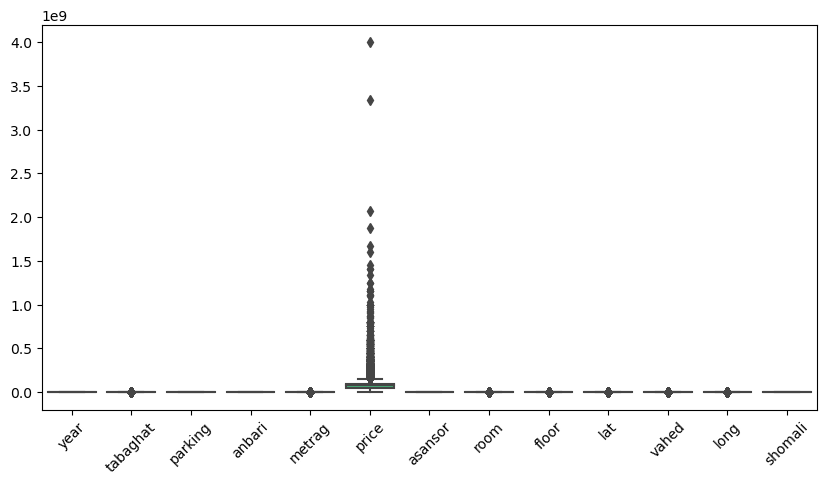

In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df)
plt.show()

In [35]:
cols = ["price"]
Q1=df.quantile(0.2)
Q3=df.quantile(0.55)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

/tmp/ipykernel_8510/3429753807.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_8510/3429753807.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,18731.000000,18731.000000,18731.000000,18731.000000,18731.000000,1.873100e+04,18731.000000,18731.000000,18731.000000,18731.000000,18731.000000,18731.000000,18731.00000
mean,1390.029310,5.182105,0.763654,0.772249,123.200577,7.255530e+07,0.690353,2.190113,3.332337,36.103669,4.098446,51.966713,0.34515
std,9.245962,2.965740,0.424849,0.419392,155.676678,2.917866e+07,0.462360,1.534790,3.028660,3.765968,2.263342,5.430263,0.47543
min,1360.000000,1.000000,0.000000,0.000000,-1.000000,1.600000e+06,0.000000,0.000000,-2.000000,7.087240,1.000000,-0.702022,0.00000
25%,1383.000000,4.000000,1.000000,1.000000,72.000000,4.761000e+07,0.000000,2.000000,2.000000,35.657200,3.000000,51.243238,0.00000
50%,1391.000000,5.000000,1.000000,1.000000,100.000000,7.200000e+07,1.000000,2.000000,3.000000,35.805335,4.000000,51.553880,0.00000
75%,1399.000000,5.000000,1.000000,1.000000,140.000000,9.210501e+07,1.000000,3.000000,4.000000,36.470180,5.000000,52.601500,1.00000
max,1401.000000,195.000000,1.000000,1.000000,11520.000000,1.525000e+08,1.000000,80.000000,31.000000,57.015630,36.000000,81.996090,1.00000


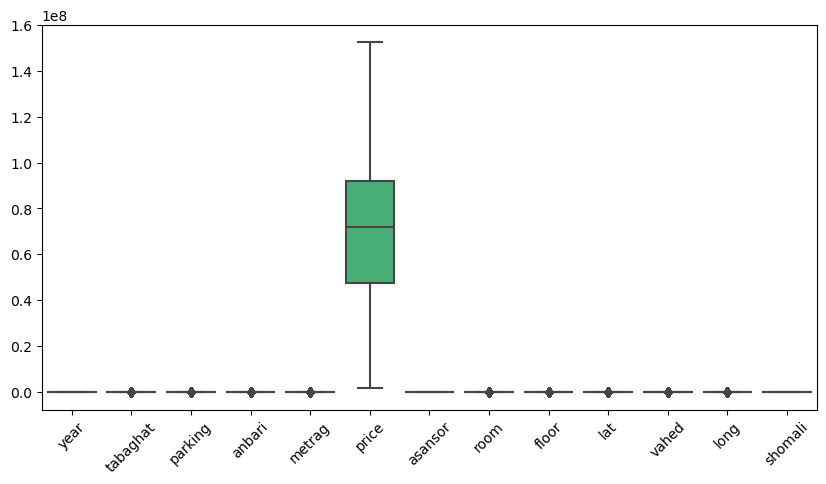

In [36]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df)
plt.show()

In [37]:
cols = ['metrag','room','floor','tabaghat']
Q1=df.quantile(0.2)
Q3=df.quantile(0.80)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

/tmp/ipykernel_8510/3119517821.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_8510/3119517821.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,1.533600e+04,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000
mean,1389.660146,4.662820,0.764215,0.803404,104.226265,6.977321e+07,0.689293,2.058164,2.748109,36.111575,3.859351,51.984933,0.346049
std,8.935981,0.720624,0.424502,0.397437,47.634639,2.784042e+07,0.462798,0.810114,1.526464,3.836434,1.172993,5.524906,0.475724
min,1362.000000,3.000000,0.000000,0.000000,-1.000000,1.600000e+06,0.000000,0.000000,-2.000000,7.087240,1.000000,-0.702022,0.000000
25%,1383.000000,4.000000,1.000000,1.000000,69.000000,4.554250e+07,0.000000,2.000000,2.000000,35.657200,4.000000,51.185610,0.000000
50%,1390.000000,5.000000,1.000000,1.000000,95.000000,6.866850e+07,1.000000,2.000000,3.000000,35.805003,4.000000,51.553880,0.000000
75%,1398.000000,5.000000,1.000000,1.000000,130.000000,9.210501e+07,1.000000,3.000000,4.000000,36.470180,5.000000,52.601500,1.000000
max,1401.000000,6.000000,1.000000,1.000000,273.000000,1.524000e+08,1.000000,6.000000,8.000000,57.015630,8.000000,81.996090,1.000000


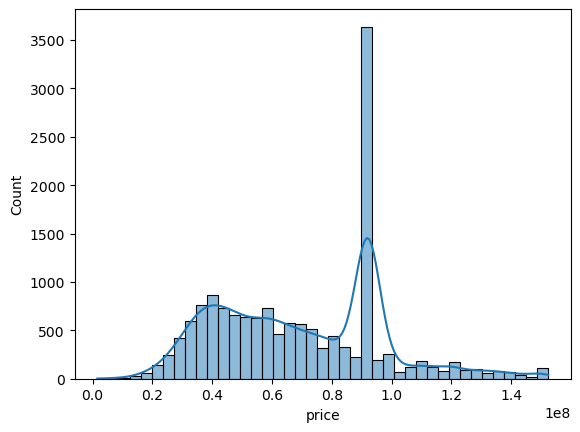

In [38]:
sns.histplot(df["price"], kde=True)
plt.show()

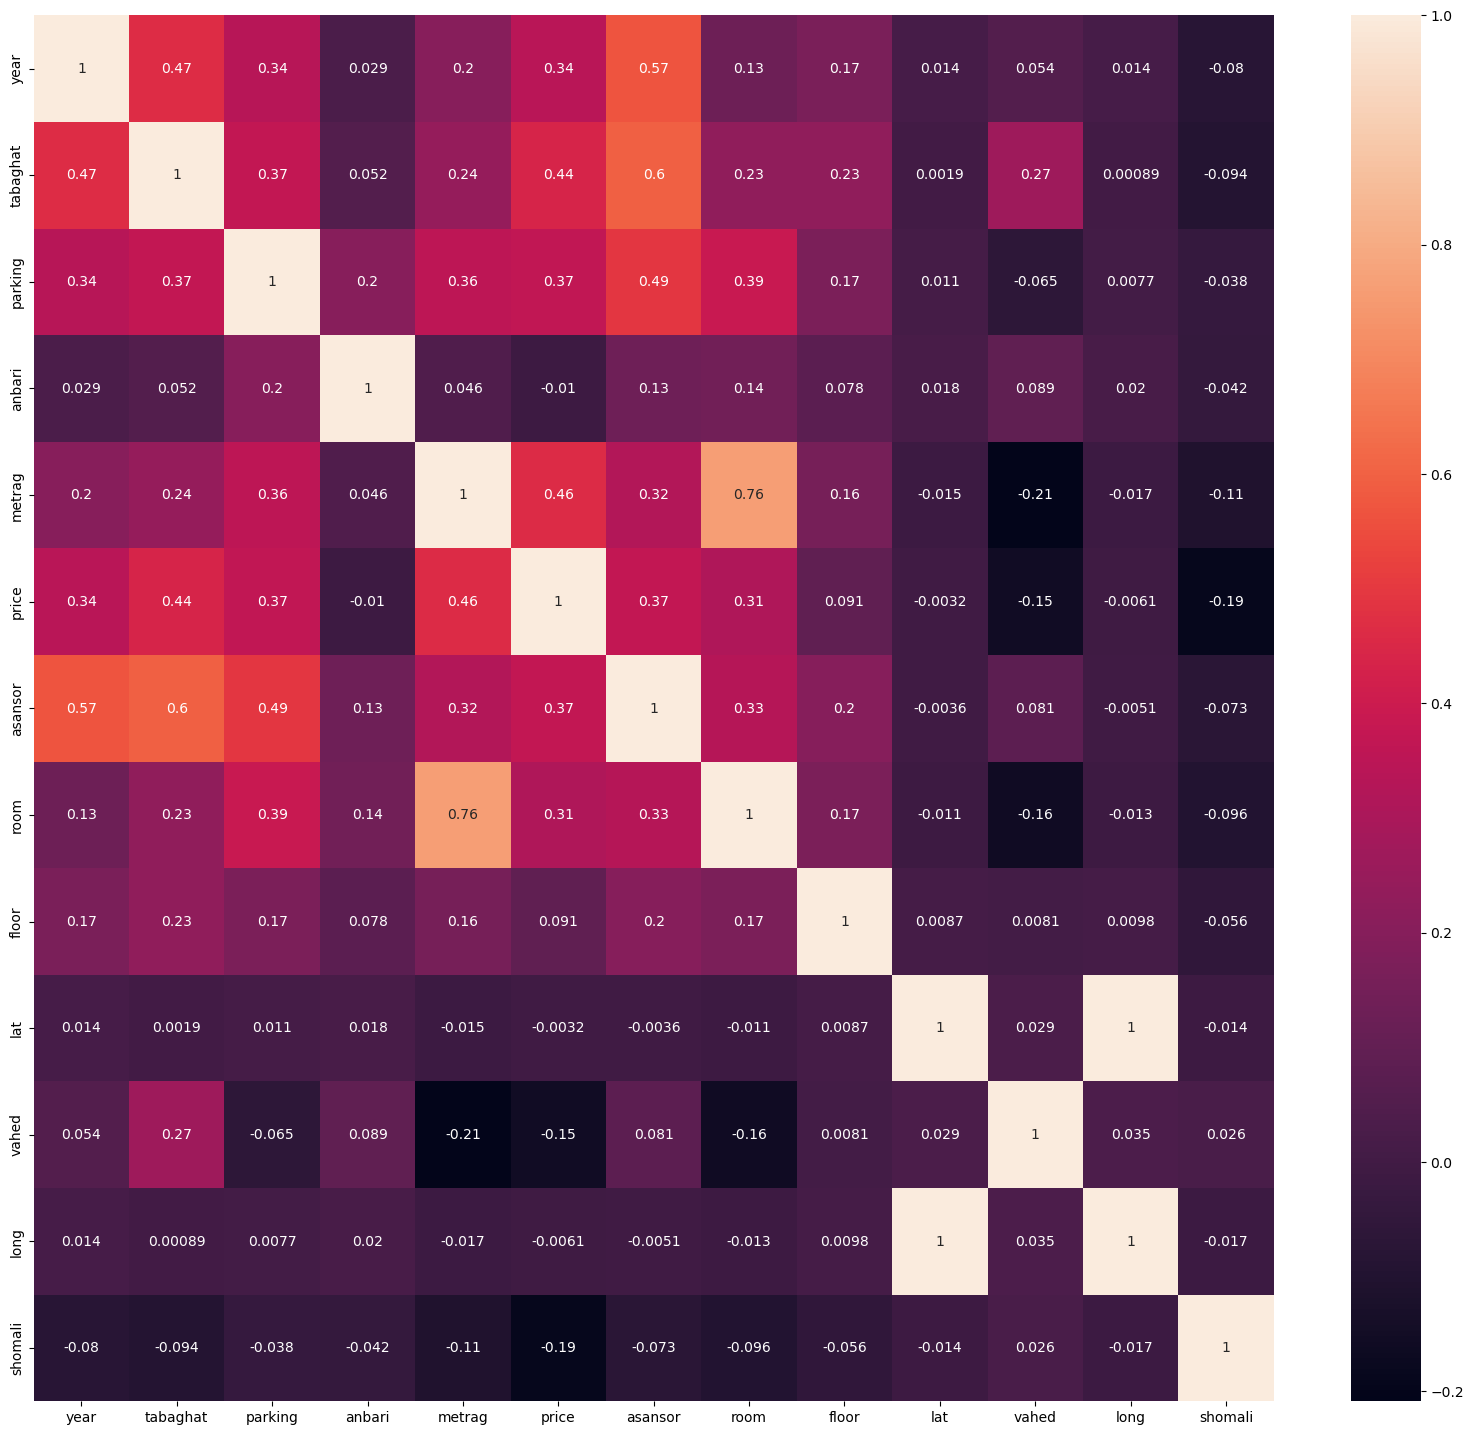

In [39]:
corr_date = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_date,annot=True)
plt.show()

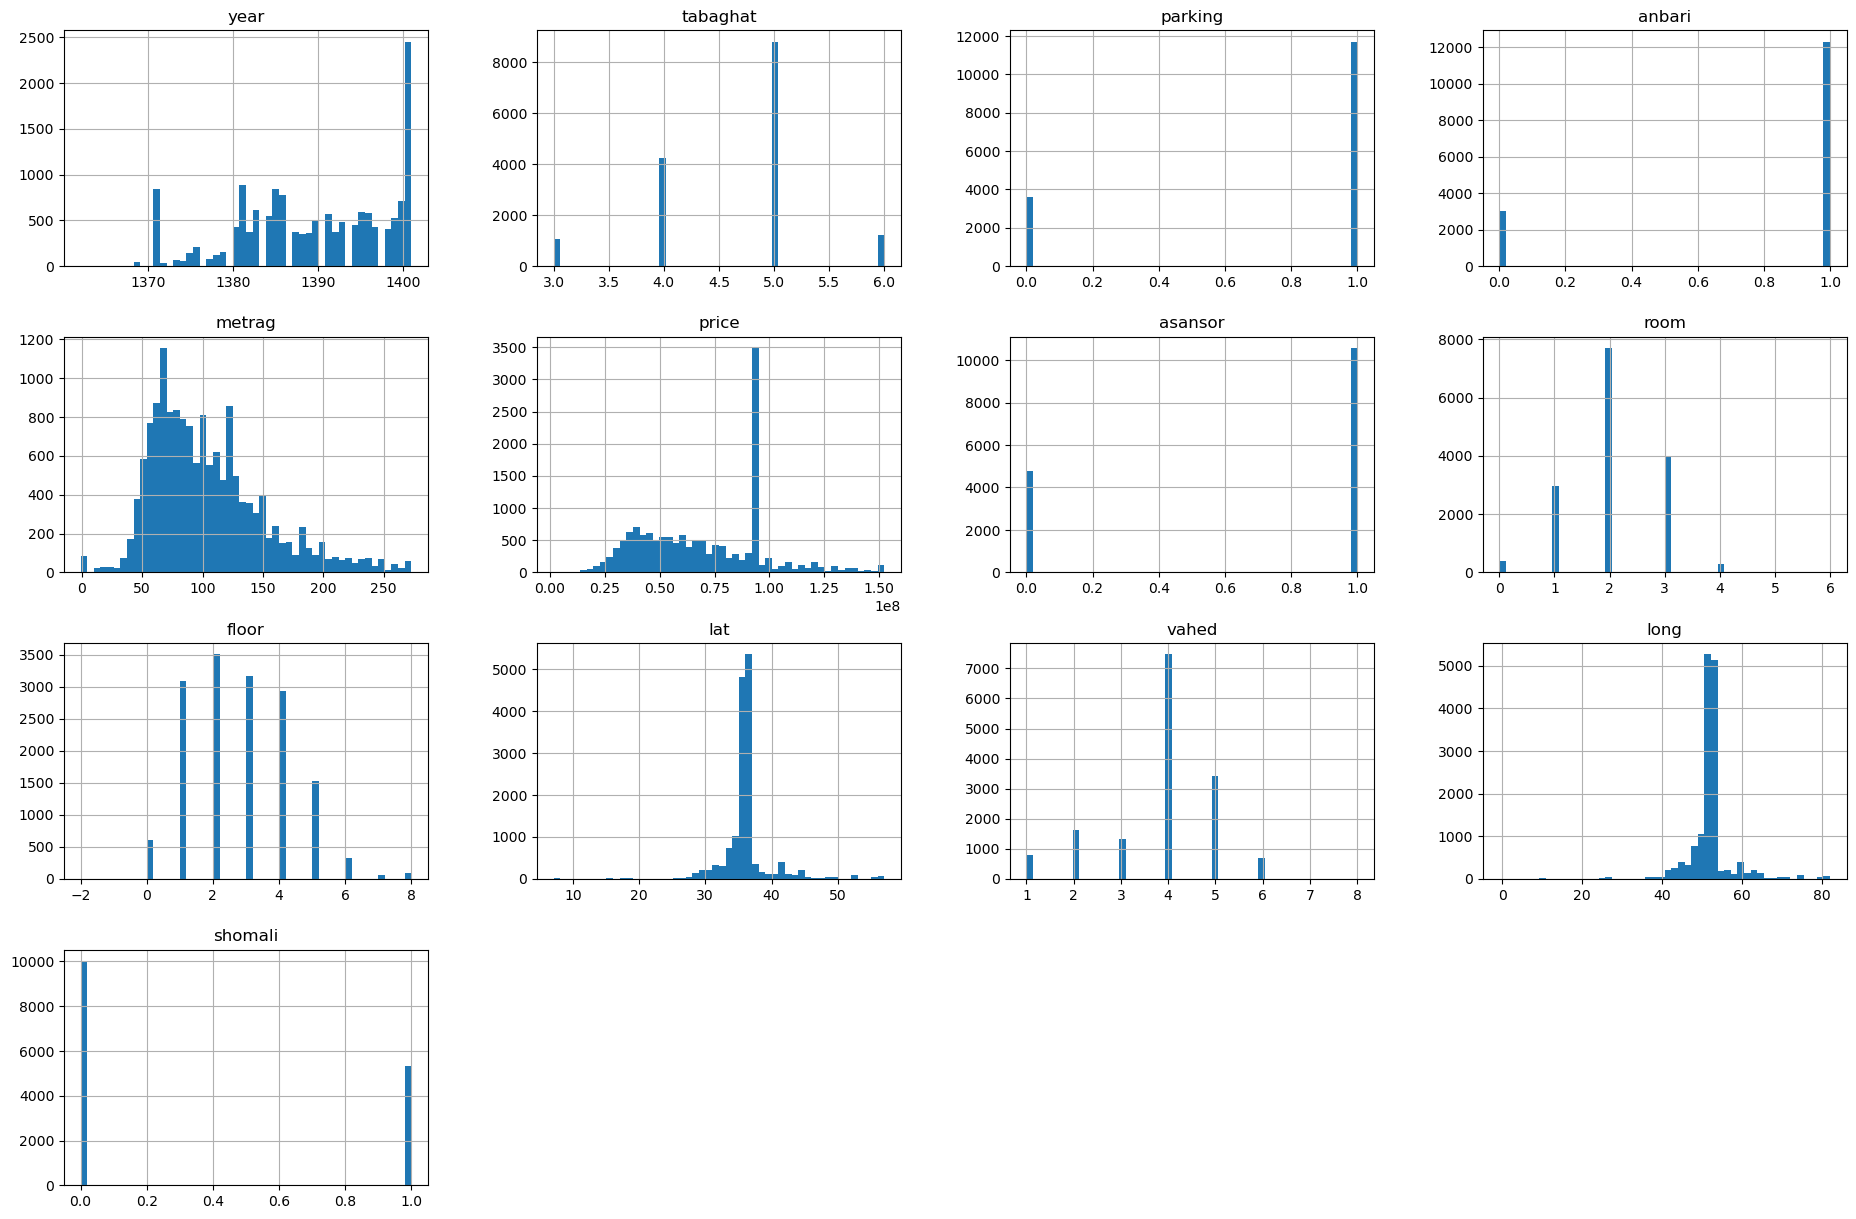

In [40]:
df.hist(bins=50, figsize=(23,15))
plt.show()

In [41]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

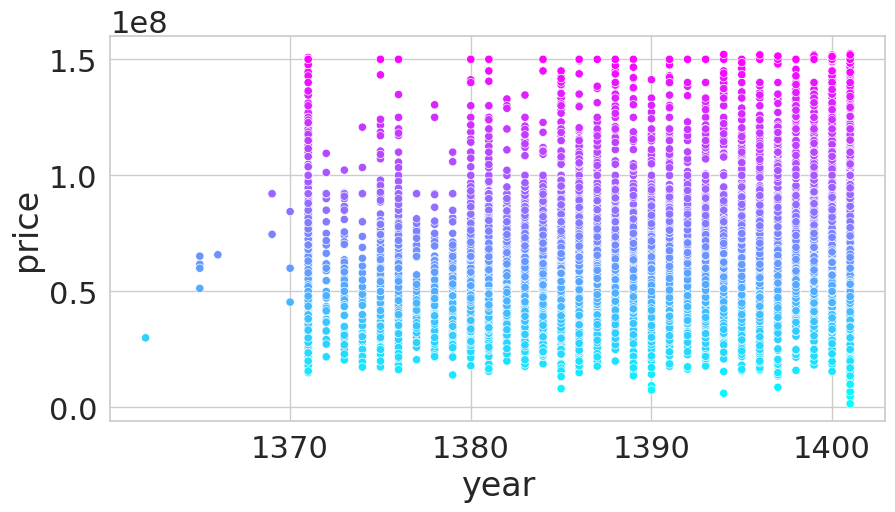

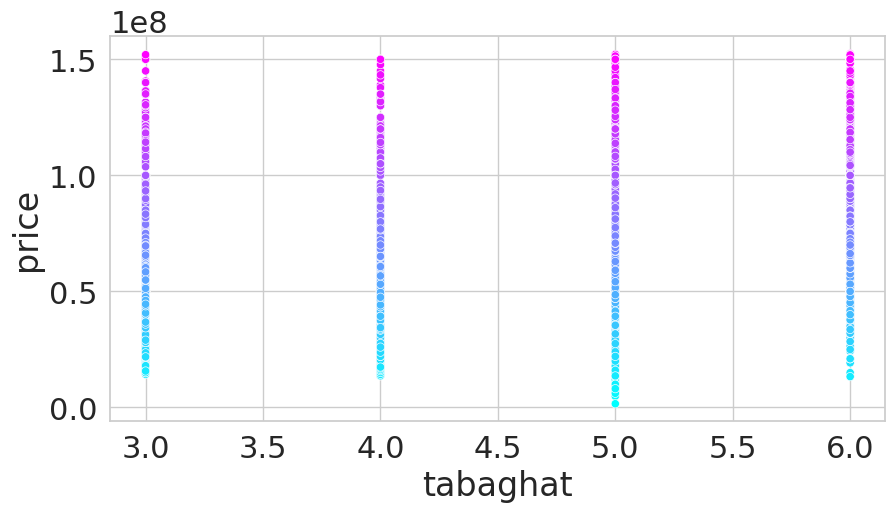

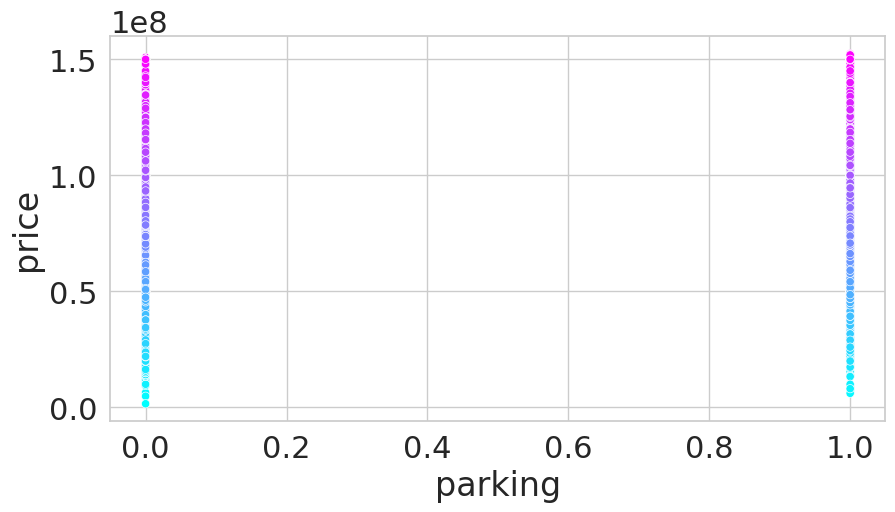

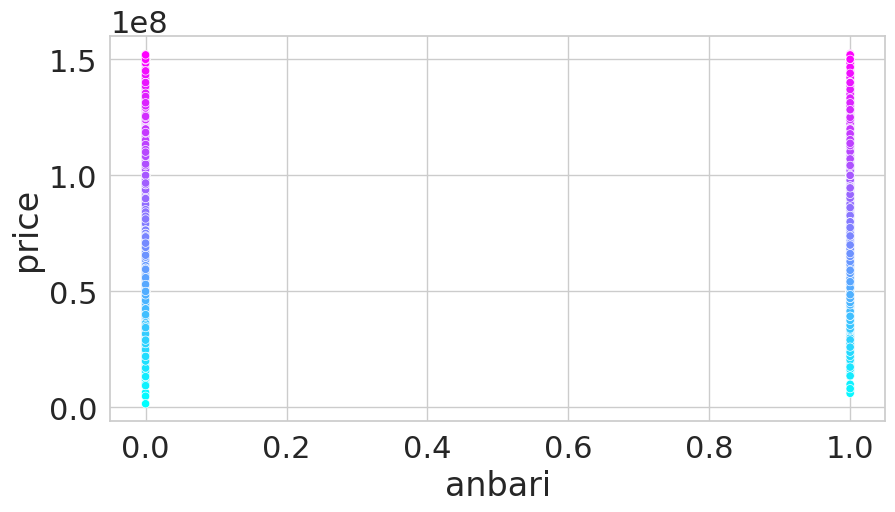

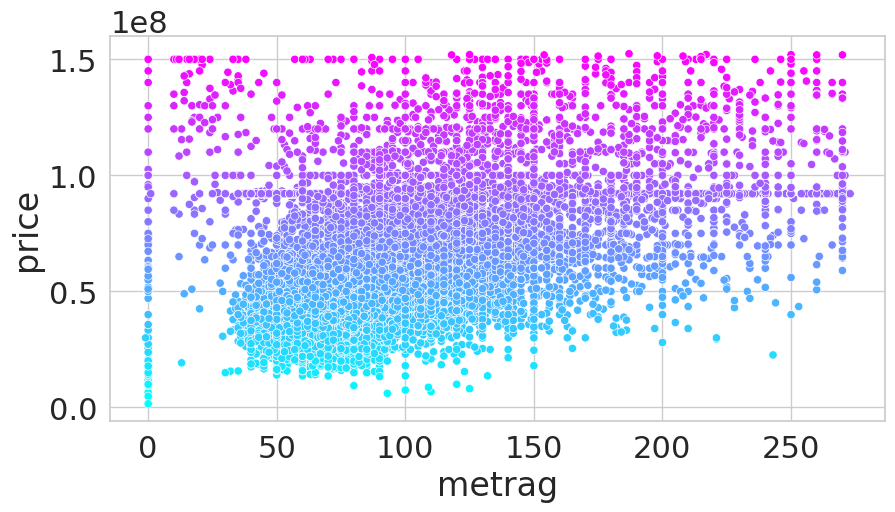

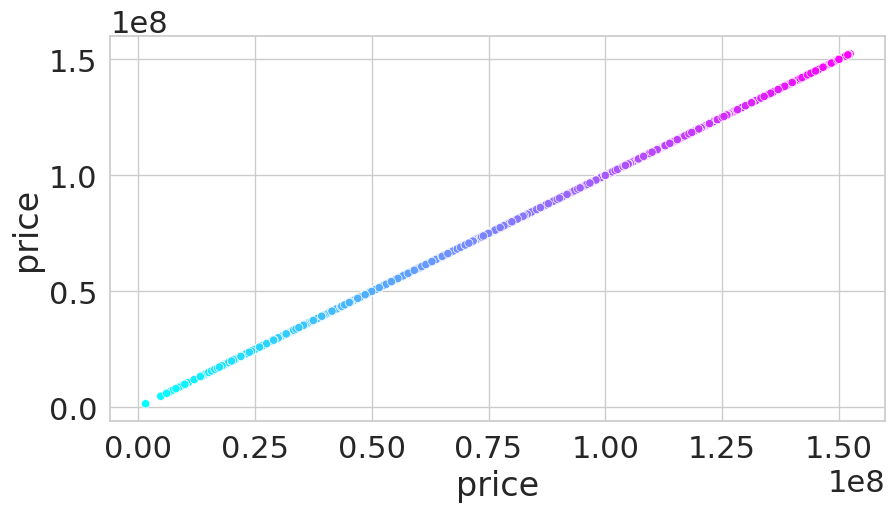

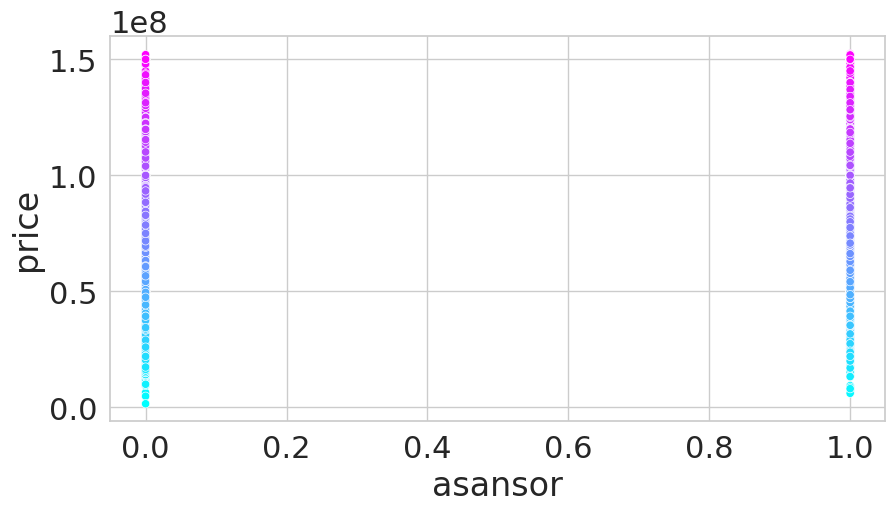

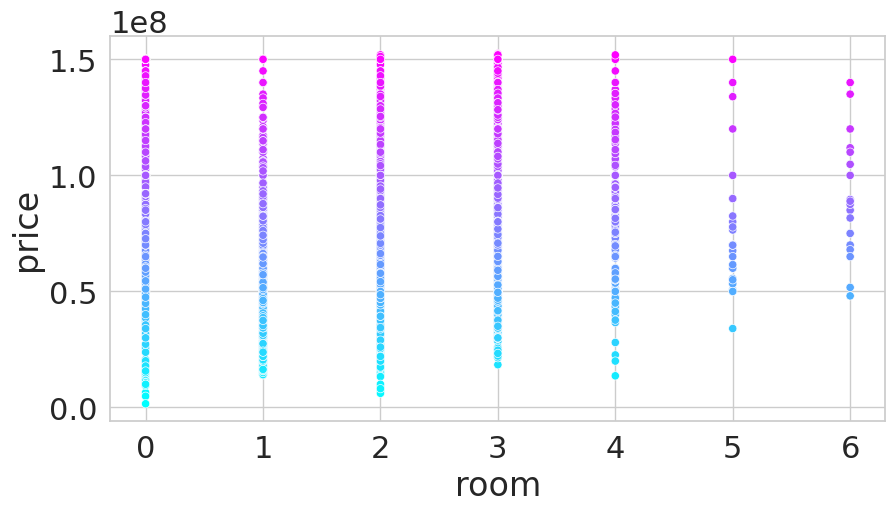

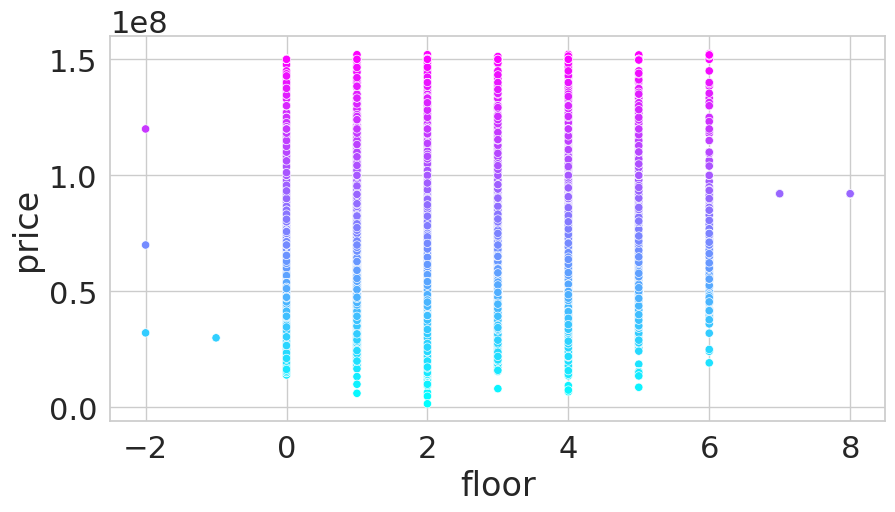

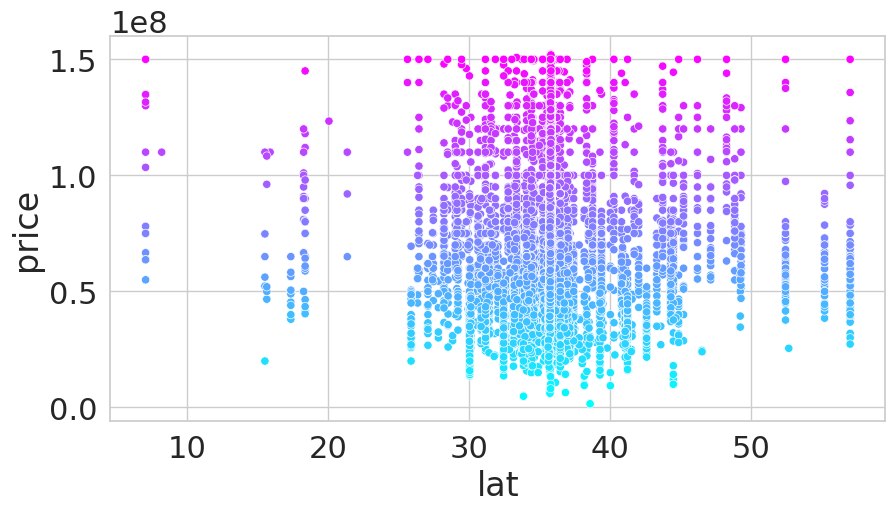

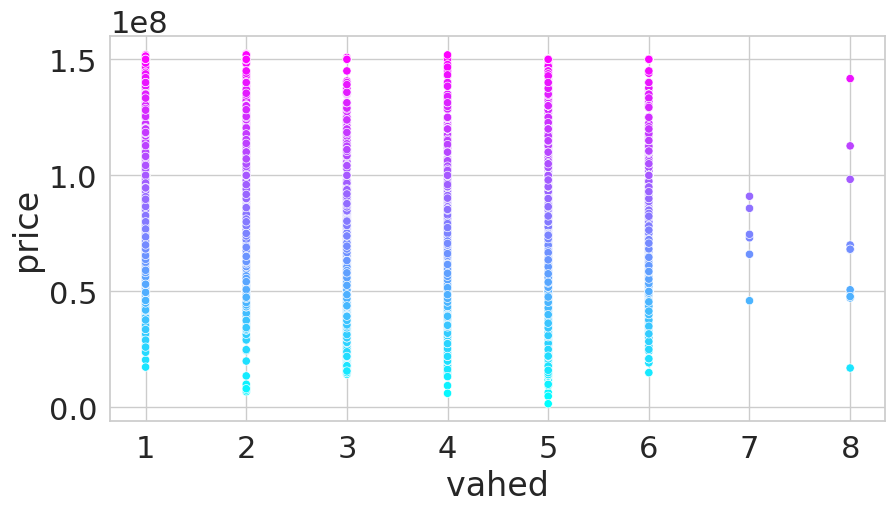

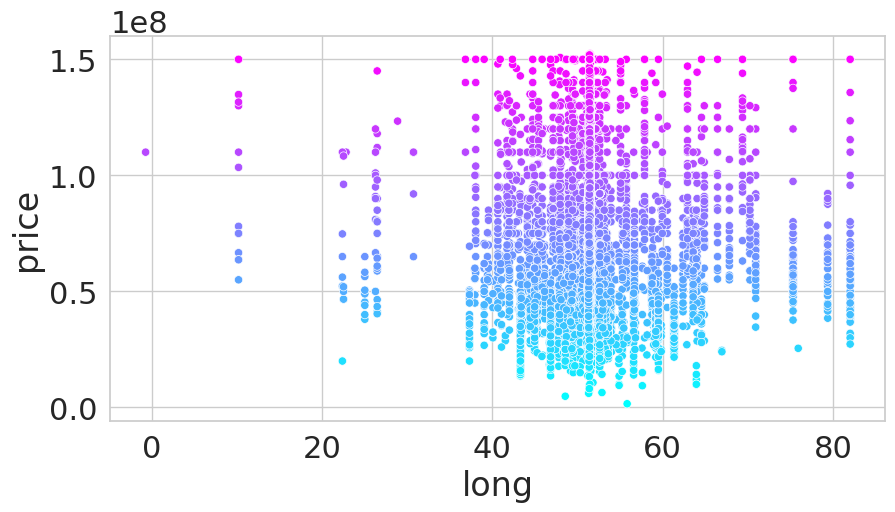

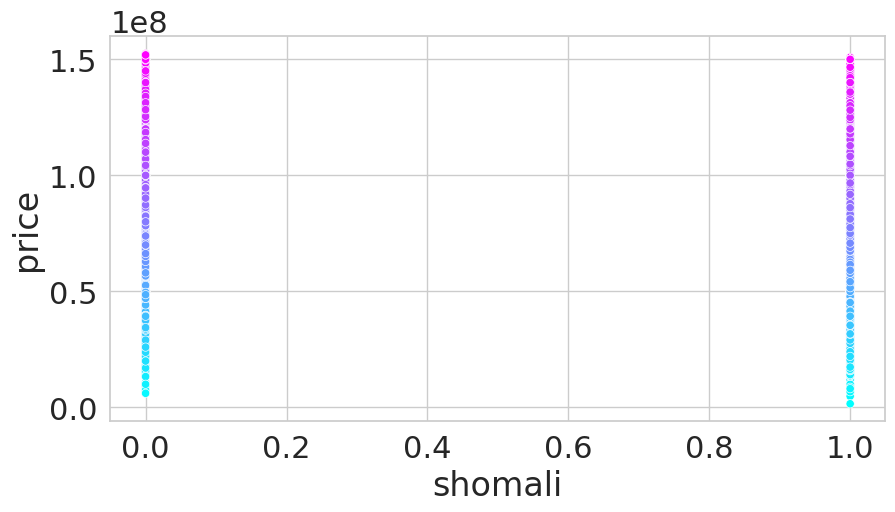

In [42]:
for feature in df.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=feature,y='price',
                    hue='price', palette='cool', legend=False)
    plt.show()

## Splitting the dataset into the Training set and Test set

In [43]:
X = df.drop(['price'],axis=1)
y = df.filter(['price'],axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [45]:
from sklearn.preprocessing import StandardScaler


In [46]:
# numeric=['lat','long','floor','room','metrag','tabaghat','year']
# sc=StandardScaler()
# X_train[numeric]=sc.fit_transform(X_train[numeric])
# X_test[numeric]=sc.transform(X_test[numeric])


# Feature Scaling

## Feature scaling with Pipeline

In [47]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## Predicting the Test set results

In [48]:
y_predict= model.predict(X_test)

In [49]:
print("MSE (LinearRegression): ", metrics.mean_squared_error(y_test, y_predict))
print("R2_SCORE (LinearRegression): ", metrics.r2_score(y_test, y_predict))
print("MAPE (LinearRegression): ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["price"].mean()

MSE (LinearRegression):  470515838788277.4
R2_SCORE (LinearRegression):  0.40161064767927046
MAPE (LinearRegression):  0.29891865809791474


0.3108840359562201

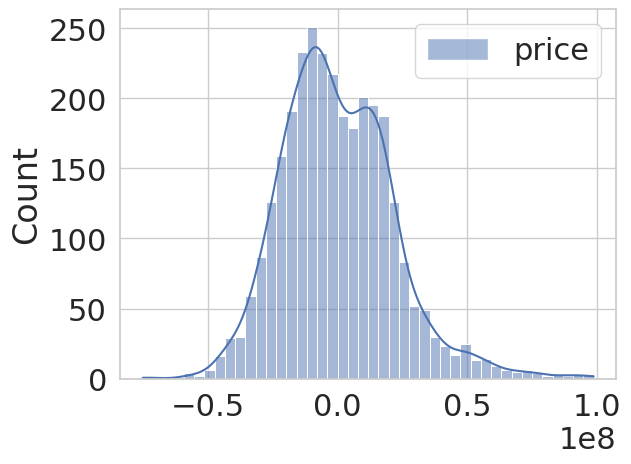

In [50]:
sns.histplot(y_test - y_predict, kde=True)
plt.show()

In [51]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=4, include_bias=False), 
              Ridge(alpha=1))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

print("MSE (Ridge + Polynomial): ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("R2_SCORE (Ridge + Polynomial): ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MAPE (Ridge + Polynomial): ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)) / df["price"].mean()

MSE (Ridge + Polynomial):  326779441829452.44
R2_SCORE (Ridge + Polynomial):  0.5844107202604816
MAPE (Ridge + Polynomial):  0.19828423662415526


0.259082847109733

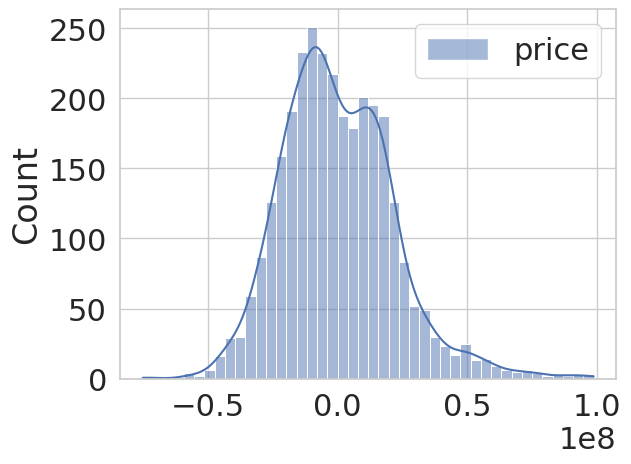

In [52]:
sns.histplot(y_test - y_predict, kde=True)
plt.show()